In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/movielens-20m-dataset/rating.csv
/kaggle/input/movielens-20m-dataset/link.csv
/kaggle/input/movielens-20m-dataset/genome_tags.csv
/kaggle/input/movielens-20m-dataset/genome_scores.csv
/kaggle/input/movielens-20m-dataset/tag.csv
/kaggle/input/movielens-20m-dataset/movie.csv


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

## tag

In [4]:
tag = pd.read_csv('/kaggle/input/movielens-20m-dataset/tag.csv')
tag.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,2009-04-24 18:19:40
1,65,208,dark hero,2013-05-10 01:41:18
2,65,353,dark hero,2013-05-10 01:41:19
3,65,521,noir thriller,2013-05-10 01:39:43
4,65,592,dark hero,2013-05-10 01:41:18


In [5]:
print(tag.isna().sum())
print(tag.isnull().sum())

userId        0
movieId       0
tag          16
timestamp     0
dtype: int64
userId        0
movieId       0
tag          16
timestamp     0
dtype: int64


In [6]:
tag.sort_values(by='movieId').head()

,userId,movieId,tag,timestamp
358938,110148,1,friendship,2015-01-30 08:15:56
42994,10616,1,animation,2010-06-24 05:30:17
42993,10616,1,animated,2010-06-24 05:30:19
42992,10616,1,adventure,2010-06-24 05:30:23
134542,35984,1,animation,2006-07-09 00:37:10


In [7]:
# 감상평 정보 
tag['tag'].unique()

array(['Mark Waters', 'dark hero', 'noir thriller', ..., 'circle k',
       'This movie should have been called \\\\"How Cocaine Ruined Disney\\"\\""',
       'topless scene'], dtype=object)

## Movie & Rating


In [4]:
# movie Data
movie = pd.read_csv('/kaggle/input/movielens-20m-dataset/movie.csv')
rating = pd.read_csv('/kaggle/input/movielens-20m-dataset/rating.csv')

In [5]:
print(movie.shape)
print(rating.shape)

(27278, 3)
(20000263, 4)


In [6]:
movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [14]:
rating.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [15]:
rating.sort_values(by='movieId').head()

,userId,movieId,rating,timestamp
14162882,97809,1,3.0,2008-06-11 04:47:11
15347420,106140,1,5.0,2013-01-29 03:33:49
15347355,106138,1,3.0,2002-07-31 15:48:53
10170195,70354,1,4.5,2011-02-13 18:55:40
10170255,70355,1,3.5,2008-01-26 16:56:54


In [16]:
print(rating.isnull().sum())
print(rating.isna().sum())

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


In [17]:
#평점 0.5점 간격
rating['rating'].unique()

array([3.5, 4. , 3. , 4.5, 5. , 2. , 1. , 2.5, 0.5, 1.5])

In [18]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000263 entries, 0 to 20000262
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 610.4+ MB


In [19]:
rating['timestamp']=pd.to_datetime(rating['timestamp'])
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000263 entries, 0 to 20000262
Data columns (total 4 columns):
 #   Column     Dtype         
---  ------     -----         
 0   userId     int64         
 1   movieId    int64         
 2   rating     float64       
 3   timestamp  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 610.4 MB


In [20]:
rating['date']=rating['timestamp'].dt.date

In [ ]:
rating2 = rating[['movieId', 'rating']]
pd.pivot_table(rating2, values)

### Rating

In [34]:
rating2 = rating[['movieId', 'rating']]
rating2 = rating2.groupby(by='movieId').mean()
rating2 = rating2.reset_index().rename(columns={'rating':'avg_rating'})
rating2.head(2)

,movieId,avg_rating
0,1,3.921240
1,2,3.211977


In [28]:
rating2.describe()

,movieId,rating_mean
count,26744.000000,26744.000000
mean,58789.612436,3.133200
std,44159.344871,0.664084
min,1.000000,0.500000
25%,6795.750000,2.800000
50%,65880.000000,3.235294
75%,99110.500000,3.565217
max,131262.000000,5.000000


<AxesSubplot:>

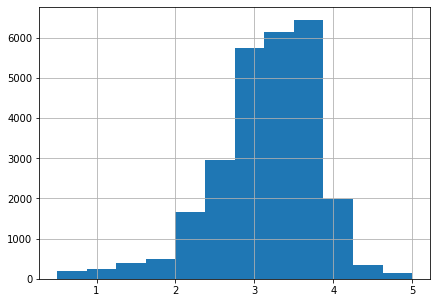

In [33]:
plt.figure(figsize=(7,5))
rating2['rating_mean'].hist(bins=12)

### adding rating_mean col

,movieId,avg_rating,title,genres
0,1,3.921240,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,3.211977,Jumanji (1995),Adventure|Children|Fantasy
2,3,3.151040,Grumpier Old Men (1995),Comedy|Romance
3,4,2.861393,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,3.064592,Father of the Bride Part II (1995),Comedy
...,...,...,...,...
26739,131254,4.000000,Kein Bund für's Leben (2007),Comedy
26740,131256,4.000000,"Feuer, Eis & Dosenbier (2002)",Comedy
26741,131258,2.500000,The Pirates (2014),Adventure
26742,131260,3.000000,Rentun Ruusu (2001),(no genres listed)


In [36]:
link = pd.read_csv('/kaggle/input/movielens-20m-dataset/link.csv')
link.head() # imdbId tmdbId

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [37]:
gtag = pd.read_csv('/kaggle/input/movielens-20m-dataset/genome_tags.csv')
gscore = pd.read_csv('/kaggle/input/movielens-20m-dataset/genome_scores.csv')
print(gtag.head())
print(gscore.head())

   tagId           tag
0      1           007
1      2  007 (series)
2      3  18th century
3      4         1920s
4      5         1930s
   movieId  tagId  relevance
0        1      1    0.02500
1        1      2    0.02500
2        1      3    0.05775
3        1      4    0.09675
4        1      5    0.14675


In [38]:
df = movie.merge(rating, on = 'movieId')

In [39]:
df.drop('timestamp', axis=1, inplace=True)
df.head()

,movieId,title,genres,userId,rating,date
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0,1999-12-11
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,6,5.0,1997-03-13
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.0,1996-06-05
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,10,4.0,1999-11-25
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.5,2009-01-02


In [40]:
df=df.merge(rating2, on='movieId')
df.head()

,movieId,title,genres,userId,rating,date,avg_rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0,1999-12-11,3.92124
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,6,5.0,1997-03-13,3.92124
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.0,1996-06-05,3.92124
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,10,4.0,1999-11-25,3.92124
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.5,2009-01-02,3.92124


In [15]:
df.groupby(['title','genres']).sum()

,,movieId,userId,rating
title,genres,,,
#chicagoGirl: The Social Network Takes on a Dictator (2013),Documentary,335634,196178,11.0
$ (Dollars) (1971),Comedy|Crime|Drama,2044248,1999607,68.0
$5 a Day (2008),Comedy|Drama,3134079,2247432,112.0
$9.99 (2008),Animation,4096730,4034850,165.5
$ellebrity (Sellebrity) (2012),Documentary,215002,87833,4.0
...,...,...,...,...
À propos de Nice (1930),Documentary,435484,396009,12.5
Árido Movie (2005),Drama,101307,32391,2.0
Åsa-Nisse - Wälkom to Knohult (2011),Comedy,201128,197453,3.0


## Genres to Columns

In [7]:
movie.genres

0        Adventure|Animation|Children|Comedy|Fantasy
1                         Adventure|Children|Fantasy
2                                     Comedy|Romance
3                               Comedy|Drama|Romance
4                                             Comedy
                            ...                     
27273                                         Comedy
27274                                         Comedy
27275                                      Adventure
27276                             (no genres listed)
27277                       Adventure|Fantasy|Horror
Name: genres, Length: 27278, dtype: object

In [8]:
genres_list = list(movie.genres)
genres_list2=[]
genres_list3=[]
for i in genres_list :
    genres_list2.append(i.split('|'))
    genres_list3.extend(i.split('|'))

In [9]:
# row 
genres_list2[0:2]

[['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy'],
 ['Adventure', 'Children', 'Fantasy']]

In [10]:
genres_list3[0:10]

['Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Fantasy',
 'Adventure',
 'Children',
 'Fantasy',
 'Comedy',
 'Romance']

In [11]:
# remove duplicates
genres_list3 = set(genres_list3)
genres_list3

{'(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

In [12]:
print(len(genres_list2), len(genres_list3))

27278 20


In [13]:
for i in genres_list3 : 
    movie[i] = 0
movie.head()

,movieId,title,genres,Animation,Documentary,Children,Thriller,Sci-Fi,Mystery,(no genres listed),...,Musical,Western,Romance,Comedy,Drama,IMAX,Fantasy,Action,Horror,War
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
movie.shape

(27278, 23)

In [15]:
movie.columns[3:23]

Index(['Animation', 'Documentary', 'Children', 'Thriller', 'Sci-Fi', 'Mystery',
       '(no genres listed)', 'Crime', 'Film-Noir', 'Adventure', 'Musical',
       'Western', 'Romance', 'Comedy', 'Drama', 'IMAX', 'Fantasy', 'Action',
       'Horror', 'War'],
      dtype='object')

In [16]:
for i in movie.index :
    for c in movie.columns[3:23]  :
        for l in genres_list2[i] :
            if l == c :
                movie.at[i,c] = 1
movie.head(3)

,movieId,title,genres,Animation,Documentary,Children,Thriller,Sci-Fi,Mystery,(no genres listed),...,Musical,Western,Romance,Comedy,Drama,IMAX,Fantasy,Action,Horror,War
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0


In [22]:
# movie.loc[0]
movie.iloc[0,:]

movieId                                                         1
title                                            Toy Story (1995)
genres                Adventure|Animation|Children|Comedy|Fantasy
Animation                                                       1
Documentary                                                     0
Children                                                        1
Thriller                                                        0
Sci-Fi                                                          0
Mystery                                                         0
(no genres listed)                                              0
Crime                                                           0
Film-Noir                                                       0
Adventure                                                       1
Musical                                                         0
Western                                                         0
Romance   

In [23]:
# genre columns
movie.iloc[:,3:23]

,Animation,Documentary,Children,Thriller,Sci-Fi,Mystery,(no genres listed),Crime,Film-Noir,Adventure,Musical,Western,Romance,Comedy,Drama,IMAX,Fantasy,Action,Horror,War
0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0
1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27273,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
27274,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
27275,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
27276,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


# Content Based Recommender system 
- genres

In [24]:
# Cosine similarity 
from sklearn.metrics.pairwise import cosine_similarity

In [26]:
sim = cosine_similarity(movie.iloc[:,3:23])
sim

array([[1.        , 0.77459667, 0.31622777, ..., 0.4472136 , 0.        ,
        0.51639778],
       [0.77459667, 1.        , 0.        , ..., 0.57735027, 0.        ,
        0.66666667],
       [0.31622777, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.4472136 , 0.57735027, 0.        , ..., 1.        , 0.        ,
        0.57735027],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.51639778, 0.66666667, 0.        , ..., 0.57735027, 0.        ,
        1.        ]])

In [27]:
sim.shape

(27278, 27278)

In [30]:
sim[0][0]  # similarity itself

0.9999999999999999

In [31]:
sim[0][1] # toystory with Jumanji

0.7745966692414835

In [36]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(movie.index,index = movie['title']).drop_duplicates()

In [37]:
indices

title
Toy Story (1995)                          0
Jumanji (1995)                            1
Grumpier Old Men (1995)                   2
Waiting to Exhale (1995)                  3
Father of the Bride Part II (1995)        4
                                      ...  
Kein Bund für's Leben (2007)          27273
Feuer, Eis & Dosenbier (2002)         27274
The Pirates (2014)                    27275
Rentun Ruusu (2001)                   27276
Innocence (2014)                      27277
Length: 27278, dtype: int64

In [43]:
# pd.set_option('display.max_rows', None)
indices.head()
# Avengers, The (1998) 

title
Toy Story (1995)                      0
Jumanji (1995)                        1
Grumpier Old Men (1995)               2
Waiting to Exhale (1995)              3
Father of the Bride Part II (1995)    4
dtype: int64

In [46]:
# input movie
movie_input =indices['Avengers, The (1998)']

In [59]:
# input movie 에 대한 score matrix
sim_scores= list(enumerate(sim[movie_input]))
# sort by similarity score (descending)
sim_scores_sorted = sorted(sim_scores, key = lambda x : x [1], reverse = True)
sim_scores_sorted[1:11]

[(692, 0.9999999999999998),
 (748, 0.9999999999999998),
 (796, 0.9999999999999998),
 (1029, 0.9999999999999998),
 (1173, 0.9999999999999998),
 (1263, 0.9999999999999998),
 (1554, 0.9999999999999998),
 (1784, 0.9999999999999998),
 (2069, 0.9999999999999998),
 (2943, 0.9999999999999998)]

In [61]:
# output movie (top 10 similarity)
movie['title'].iloc[[ i[0] for i in sim_scores_sorted[1:11]]]

692                                     Quest, The (1996)
748                                   Phantom, The (1996)
796                                           Fled (1996)
1029                   Ghost and the Darkness, The (1996)
1173    Raiders of the Lost Ark (Indiana Jones and the...
1263            Indiana Jones and the Last Crusade (1989)
1554                            Kull the Conqueror (1997)
1784                      Tarzan and the Lost City (1998)
2069                                 Avengers, The (1998)
2943                                       Yojimbo (1961)
Name: title, dtype: object